In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

we use the randn function to generate noise

In [31]:
rand = np.random.randn
a = rand() 
print(a)

-0.6951321934067716


In [61]:
# Generate a sequence to analyse
x = np.linspace(-5,5,101)       # independent variable in the analysis; 
#print(x)
gamma = 5                     # slope to generate data; low value means less contribution of x and more of noise
ySimulated = gamma * x*x + rand(101) + 5 

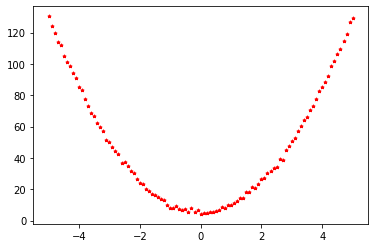

In [62]:
plt.scatter(x,ySimulated,c="r",s=10, marker = '*')

In [63]:
# calculating the statistical measures (mean and variances)
mu_ySim = ySimulated.mean()
mu_x = x.mean()
covxy = np.cov(x,ySimulated)
varx = np.var(x)
vary = np.var(ySimulated)
# another way np.cov() works is directly on a block of data
X = np.array([x,ySimulated]) # we are just stacking x and ySimulated; see X.shape below
#print(x.shape,X.shape)
covMatrix = np.cov(X)
print(varx, vary, covxy)
print()
print(covxy)
#print(covMatrix)

np.corrcoef(X)

8.5 1441.5526175309635 [[8.58500000e+00 1.25940922e-01]
 [1.25940922e-01 1.45596814e+03]]

[[8.58500000e+00 1.25940922e-01]
 [1.25940922e-01 1.45596814e+03]]


array([[1.        , 0.00112647],
       [0.00112647, 1.        ]])

____________________________________________
Let's fit the model yPredicted = b0 + b1*x

In [64]:
b1 = covxy[1,0]/varx
b0 = mu_ySim - b1*mu_x
print(b0,b1)

47.67487984596917 0.014816579012240287


Let's calculate the std. errors and t-statistics for b0 and b1

# 

In [58]:
yPredicted = b0 + b1*x
residuals = ySimulated - yPredicted 
resSquares = residuals**2
resSumSquares = resSquares.sum()
resStdErr = np.sqrt(resSumSquares/(101-2))


# additional variablues required in calculation
mu_x_squared = mu_x**2
sumSquaredDev_x = ((x - mu_x)**2).sum()
# std. error of b0
se_b0_squared = resStdErr**2*(1/101 + mu_x_squared/sumSquaredDev_x)
se_b0 = np.sqrt(se_b0_squared)

t = abs((b0 - 0)/se_b0)
print(t)

p = (1 - stats.t.cdf(t,df=101-2))* 2

print(p)

10.575352564162056
0.0


In [59]:
xt = np.linspace(-t-2,t+2,1001)
tdist = stats.t.pdf(xt,df=99)

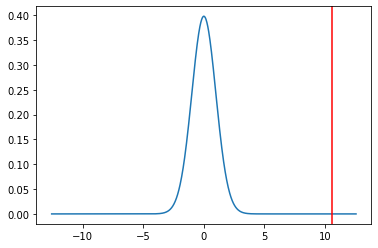

In [60]:
plt.plot(xt,tdist)
plt.axvline(t,0,1,color='red')